In [4]:
import pandas as pd
files = []
for i in range(4):
    name = 'data/pems_output_' + str(i) + '.xlsx'
    files.append(name)
    
dfs = []
for file in files:
    data = pd.read_excel(file, sheetname=0)
    dfs.append(data)

/home/ben/.local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [5]:
print(dfs[1].head(2))

        5 Minutes  Lane 1 Flow (Veh/5 Minutes)  Lane 1 Speed (mph)  \
0  3/08/2018 0:00                           28                71.9   
1  3/08/2018 0:05                           29                71.8   

   Lane 2 Flow (Veh/5 Minutes)  Lane 2 Speed (mph)  \
0                           36                71.0   
1                           35                70.8   

   Lane 3 Flow (Veh/5 Minutes)  Lane 3 Speed (mph)  \
0                           32                66.9   
1                           32                66.3   

   Lane 4 Flow (Veh/5 Minutes)  Lane 4 Speed (mph)  \
0                           24                64.9   
1                           24                64.3   

   Lane 5 Flow (Veh/5 Minutes)  Lane 5 Speed (mph)  Flow (Veh/5 Minutes)  \
0                            9                62.9                   129   
1                            6                62.7                   126   

   Speed (mph)  # Lane Points  % Observed  
0         68.5             

In [6]:
speed_feature = "Speed (mph)" 
flow_feature = "Flow (Veh/5 Minutes)"

In [7]:
print(dfs[1].head(2)[speed_feature])

0    68.5
1    68.3
Name: Speed (mph), dtype: float64


In [9]:
print(dfs[1].head(3)[flow_feature])

0    129
1    126
2     94
Name: Flow (Veh/5 Minutes), dtype: int64


In [11]:
# Combine the individual dataframes into one big df
big_df = pd.concat(dfs)

In [13]:
print(big_df.head(2))
print(big_df.tail(5))

        5 Minutes  Lane 1 Flow (Veh/5 Minutes)  Lane 1 Speed (mph)  \
0  3/01/2018 0:00                           19                71.9   
1  3/01/2018 0:05                           22                72.2   

   Lane 2 Flow (Veh/5 Minutes)  Lane 2 Speed (mph)  \
0                           23                71.0   
1                           31                71.2   

   Lane 3 Flow (Veh/5 Minutes)  Lane 3 Speed (mph)  \
0                           22                66.9   
1                           28                67.5   

   Lane 4 Flow (Veh/5 Minutes)  Lane 4 Speed (mph)  \
0                           14                64.9   
1                           21                65.5   

   Lane 5 Flow (Veh/5 Minutes)  Lane 5 Speed (mph)  Flow (Veh/5 Minutes)  \
0                            9                62.9                    87   
1                            9                63.2                   111   

   Speed (mph)  # Lane Points  % Observed  
0         68.3             

In [17]:
def mph_to_kmh(speed):
    speed *= 1.60934
    return speed

In [26]:
kmh_feature = "vPKW"
big_df[kmh_feature] = big_df[speed_feature].apply(lambda row: mph_to_kmh(row))

In [28]:
print(big_df.head(2))

        5 Minutes  Lane 1 Flow (Veh/5 Minutes)  Lane 1 Speed (mph)  \
0  3/01/2018 0:00                           19                71.9   
1  3/01/2018 0:05                           22                72.2   

   Lane 2 Flow (Veh/5 Minutes)  Lane 2 Speed (mph)  \
0                           23                71.0   
1                           31                71.2   

   Lane 3 Flow (Veh/5 Minutes)  Lane 3 Speed (mph)  \
0                           22                66.9   
1                           28                67.5   

   Lane 4 Flow (Veh/5 Minutes)  Lane 4 Speed (mph)  \
0                           14                64.9   
1                           21                65.5   

   Lane 5 Flow (Veh/5 Minutes)  Lane 5 Speed (mph)  Flow (Veh/5 Minutes)  \
0                            9                62.9                    87   
1                            9                63.2                   111   

   Speed (mph)  # Lane Points  % Observed  Speed (kmh)        vPKW  
0 

In [32]:
print(flow_feature)
print(big_df.head(2)[flow_feature])

Flow (Veh/5 Minutes)
0     87
1    111
Name: Flow (Veh/5 Minutes), dtype: int64


In [35]:
def calculate_qPKW(row):
    flow = row[flow_feature]
    vPKW = row[kmh_feature]
    return (flow/vPKW)

qPKW_feature = 'qPKW'
big_df[qPKW_feature] = big_df.apply(lambda row: calculate_qPKW(row), axis=1)

In [36]:
print(big_df.head(3))

        5 Minutes  Lane 1 Flow (Veh/5 Minutes)  Lane 1 Speed (mph)  \
0  3/01/2018 0:00                           19                71.9   
1  3/01/2018 0:05                           22                72.2   
2  3/01/2018 0:10                           14                73.7   

   Lane 2 Flow (Veh/5 Minutes)  Lane 2 Speed (mph)  \
0                           23                71.0   
1                           31                71.2   
2                           24                72.6   

   Lane 3 Flow (Veh/5 Minutes)  Lane 3 Speed (mph)  \
0                           22                66.9   
1                           28                67.5   
2                           22                68.6   

   Lane 4 Flow (Veh/5 Minutes)  Lane 4 Speed (mph)  \
0                           14                64.9   
1                           21                65.5   
2                           14                66.4   

   Lane 5 Flow (Veh/5 Minutes)  Lane 5 Speed (mph)  Flow (Veh/5 Minu

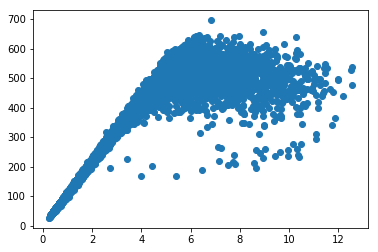

In [39]:
# Plot the density vs. flow relationship
import matplotlib.pyplot as plt
plt.scatter(big_df['qPKW'], big_df[flow_feature])
plt.show() 
# This is roughly correct

In [51]:
# We have vPKW, qPKW, the detector name, just need to get the timing now
# We need to convert time to a scalar (can't use datetime format)
# Once we finish with time, then we concatenate all appropriate dataframes and write to a csv

# def convert_time(row):
#     date_time = df['5 Minutes']
import datetime
import time
base_time = 1519884000.0
def convert_time(row):
    data = row['5 Minutes']
    formatted_data = datetime.datetime.strptime(data, "%m/%d/%Y %H:%M").timetuple()
    unix_timestamp = time.mktime(formatted_data)
    return (unix_timestamp - base_time)

    
time_feature = 'time'
big_df[time_feature] = big_df.apply(lambda row: convert_time(row), axis=1)

In [52]:
print(big_df.head(5)[time_feature])

0       0.0
1     300.0
2     600.0
3     900.0
4    1200.0
Name: time, dtype: float64


In [56]:
import csv
outfile = 'detector_flows.csv'
headers = ['Detector', 'Time', 'qPKW', 'vPKW']

with open(outfile, 'w+') as csvfile:
    flow_writer = csv.writer(csvfile, delimiter=';')
    for index, row in big_df.iterrows():
        data_to_write = ['myDetector1']
        data_to_write.append(row[time_feature])
        data_to_write.append(row[qPKW_feature])
        data_to_write.append(row['vPKW'])
        flow_writer.writerow(data_to_write)